# Pymaceuticals Inc.
---

### Analysis

Perhaps the most well-evidenced observation we can make about this data is the appearance of increased effectiveness of Ramicane and Capomulin compared to other treatments. The summary statistics make this clear with smaller tumor sizes, the bar chart of the number of observed timepoints implies longer survival times, and the box plot of most effective regimens puts the final tumor sizes of these two 20+ mm^3 smaller than the next best. 

Honing in on an individual case with the line chart, we can see steady tumor growth over 20 days on Capomulin followed by a stark reduction in size well below its baseline within another 10 days. Whether this is representative of all mice on this treatment regimen remains to be seen and would require further inquiry, but it gives us a sense of the rough range of its onset of action and how quickly it can produces results.

Finally, in our linear regression of average tumor size vs mouse weight, the data points tack somewhat closely to the regression line implying a fairly strong positive correlation. This visual observation is backed by the high correlation coefficient of r = 0.84.
 

In [173]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse = pd.merge(mouse_metadata,study_results, on = 'Mouse ID')
# Display the data table for preview
combined_mouse.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(combined_mouse['Mouse ID'].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# duplicate based on information at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
duplicate = combined_mouse[combined_mouse.duplicated(['Mouse ID', 'Timepoint'])]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
combined_mouse.loc[combined_mouse['Mouse ID'] == 'g989',:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse = combined_mouse.loc[combined_mouse['Mouse ID'] != 'g989',:]
clean_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
tumorVolumeByDrug = pd.DataFrame({'Mean Tumor Volume':clean_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean(),
                                  'Median Tumor Volume':clean_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].median(),
                                  'Tumor Volume Variance':clean_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].var(),
                                  'Tumor Volume Std. Dev.':clean_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].std(),
                                  'Tumor Volume Std. Err.':clean_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()})
tumorVolumeByDrug

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# agg function source https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.aggregate.html
clean_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

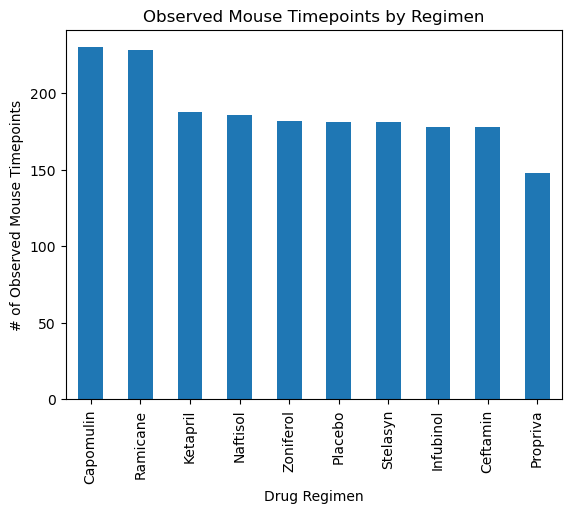

In [169]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_mouse['Drug Regimen'].value_counts().plot(kind='bar',xlabel= 'Drug Regimen',ylabel='# of Observed Mouse Timepoints',title='Observed Mouse Timepoints by Regimen')
plt.show()

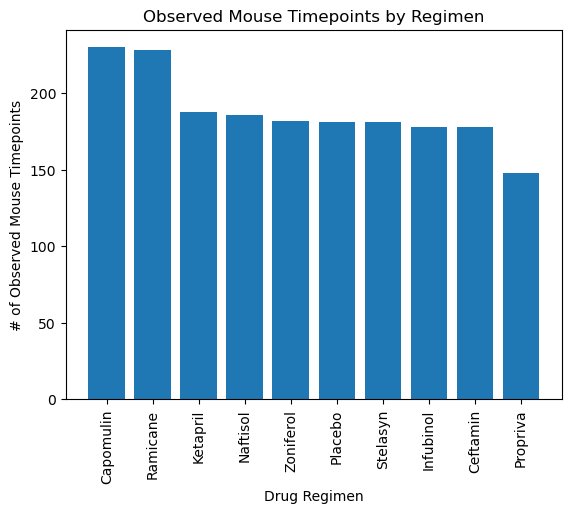

In [58]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugs = clean_mouse['Drug Regimen'].value_counts().index
observations = clean_mouse['Drug Regimen'].value_counts().values
x_axis = np.arange(len(drugs))
plt.bar(x_axis,observations,align='center')
tick_loc = [value for value in x_axis]
plt.xticks(tick_loc,drugs,rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Observed Mouse Timepoints by Regimen')

plt.show()

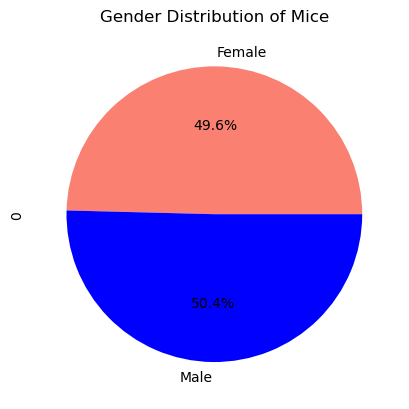

In [180]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
MouseIDGender = pd.DataFrame(clean_mouse.groupby(['Mouse ID','Sex']).size()) # I used .size here to ensure each unique mouse on appears on each row

# Make the pie chart
gender_mouse = pd.DataFrame(MouseIDGender.groupby(["Sex"]).count())[0] #[0] here uses the subplot, alternatively I could have called this directly in the .plot function
gender_mouse.plot(kind = 'pie',autopct = '%1.1f%%',colors=['salmon','blue'],title="Gender Distribution of Mice")
plt.show()


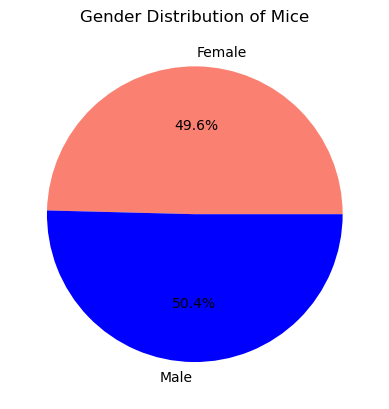

In [167]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
plt.pie(gender_mouse.values,labels= gender_mouse.index, colors=['salmon','blue'],autopct='%1.1f%%')
plt.title("Gender Distribution of Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [84]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
IDandTime = clean_mouse.loc[:,['Mouse ID','Timepoint']]
IDandTime = IDandTime.sort_values('Timepoint') # This sorts all of the greatest Timepoints to the bottom in case the data was entered out fo order
finalTime = IDandTime.groupby('Mouse ID').last() # This only keeps the row that appears last for each unique ID

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mergeFinalTime = pd.merge(clean_mouse,finalTime, on = ['Timepoint','Mouse ID'], how='inner') # Inner merge eliminates non-final timepoints
mergeFinalTime

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [112]:
# Put treatments into a list for for loop (and later for plot labels)
bestTreatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
finalTumorSize = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in bestTreatments:
     tempTumor = []
     for row in range(0,len(mergeFinalTime)): 
        if mergeFinalTime['Drug Regimen'][row] == drug:
            tempTumor.append(mergeFinalTime['Tumor Volume (mm3)'][row]) 
     # This turns finalTumorSize into a list of 4 lists corresponding with the bestTreatments list
    # add subset
     finalTumorSize.append(tempTumor)

    # Determine outliers using upper and lower bounds
     quartiles = np.quantile(tempTumor,[.25,.5,.75])
     iqr = quartiles[2] - quartiles[0] #.75 - .25
     lb = quartiles[0] -(1.5*iqr) # lower boundary
     ub = quartiles[2] +(1.5*iqr) # upper boundary
     outliers = []
     for tumor in tempTumor:
         if tumor > ub or tumor < lb:
             outliers.append(tumor)
     print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


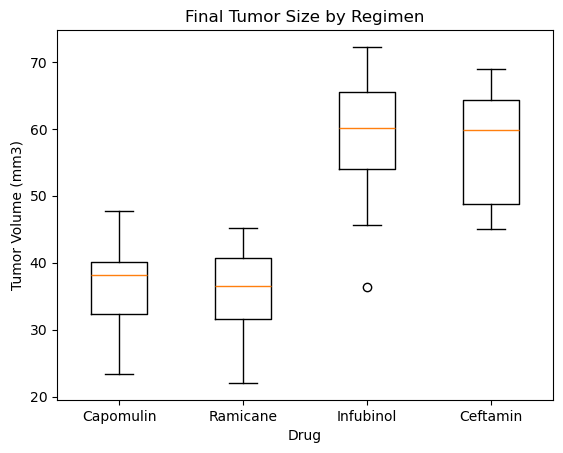

In [166]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.boxplot([finalTumorSize[0],finalTumorSize[1],finalTumorSize[2],finalTumorSize[3]])
ax1.set(
    axisbelow=True,
    title='Final Tumor Size by Regimen',
    xlabel='Drug',
    ylabel='Tumor Volume (mm3)',
)
ax1.set_xticks([1,2,3,4],labels=bestTreatments)
plt.show()

## Line and Scatter Plots

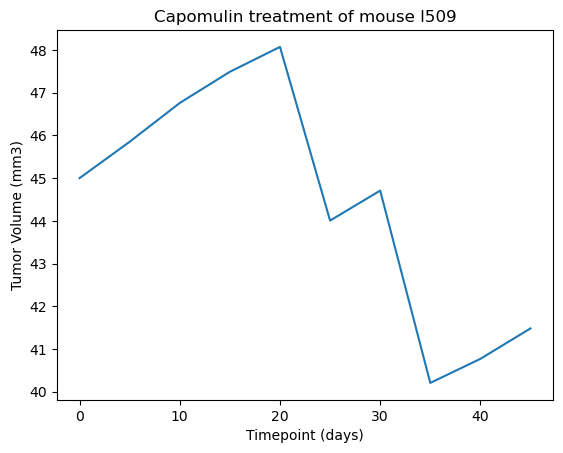

In [163]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
l509 = clean_mouse.loc[clean_mouse['Mouse ID']=='l509']
x_axis = list(l509['Timepoint'])
y_axis = list(l509['Tumor Volume (mm3)'])
plt.plot(x_axis,y_axis)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

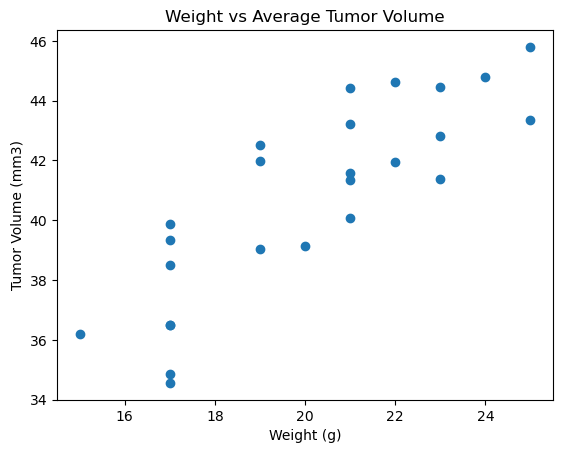

In [172]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_mouse = clean_mouse.loc[clean_mouse['Drug Regimen']=='Capomulin']
cap_mouse = cap_mouse.loc[:,['Mouse ID','Weight (g)','Tumor Volume (mm3)']]
cap_mouse = cap_mouse.groupby('Mouse ID').mean()
plt.scatter(cap_mouse['Weight (g)'].values,cap_mouse['Tumor Volume (mm3)'].values)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Weight vs Average Tumor Volume')
plt.show()

## Correlation and Regression

Correlation coefficient: 0.8419363424694719


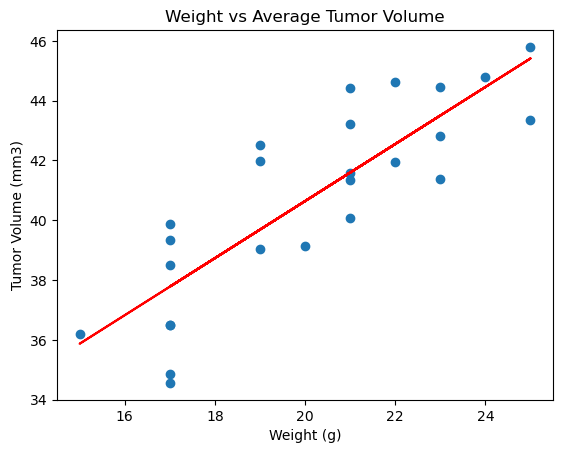

In [178]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope,intercept,rvalue,pvalue,stderr) = linregress(cap_mouse['Weight (g)'].values,cap_mouse['Tumor Volume (mm3)'].values)
regressvalues = cap_mouse['Weight (g)'].values * slope + intercept
plt.scatter(cap_mouse['Weight (g)'].values,cap_mouse['Tumor Volume (mm3)'].values)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Weight vs Average Tumor Volume')
plt.plot(cap_mouse['Weight (g)'].values,regressvalues,'r-')
print(f"Correlation coefficient: {st.pearsonr(cap_mouse['Weight (g)'].values,cap_mouse['Tumor Volume (mm3)'].values)[0]}")
plt.show()